In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import cv2
import os
import numpy as np
import glob
from matplotlib import pyplot as plt
import random
import seaborn as sn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import imutils
from imutils.contours import sort_contours

In [ ]:
DATA_DIR = '/content/gdrive/My Drive/LSMA_Final_Project/'

In [ ]:
names = np.array(list(os.listdir(DATA_DIR)))
names = np.sort(names)
names = np.delete(names,10)

print(names)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'div' 'eq' 'minus' 'plus' 'times']


In [ ]:
idx_to_name = {i:x for (i,x) in enumerate(names)}
name_to_idx = {x:i for (i,x) in enumerate(names)}

In [ ]:
data = []
labels = []
for i in names :
  imgs = (cv2.imread(img) for img in glob.glob(DATA_DIR + i + "/*.jpg"))
  for img in imgs:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    data.append(gray_img)
    labels.append(name_to_idx[i])


In [ ]:
#Shape of the dataset (45,45) images in rgb

print(np.shape(data))

(14868, 45, 45)


In [ ]:
# split the data

data_train, data_test, labels_train, labels_test = train_test_split(data, labels)


In [ ]:
data_train = np.array(data_train)
data_train = data_train/255.0

data_test = np.array(data_test)
data_test = data_test/255.0

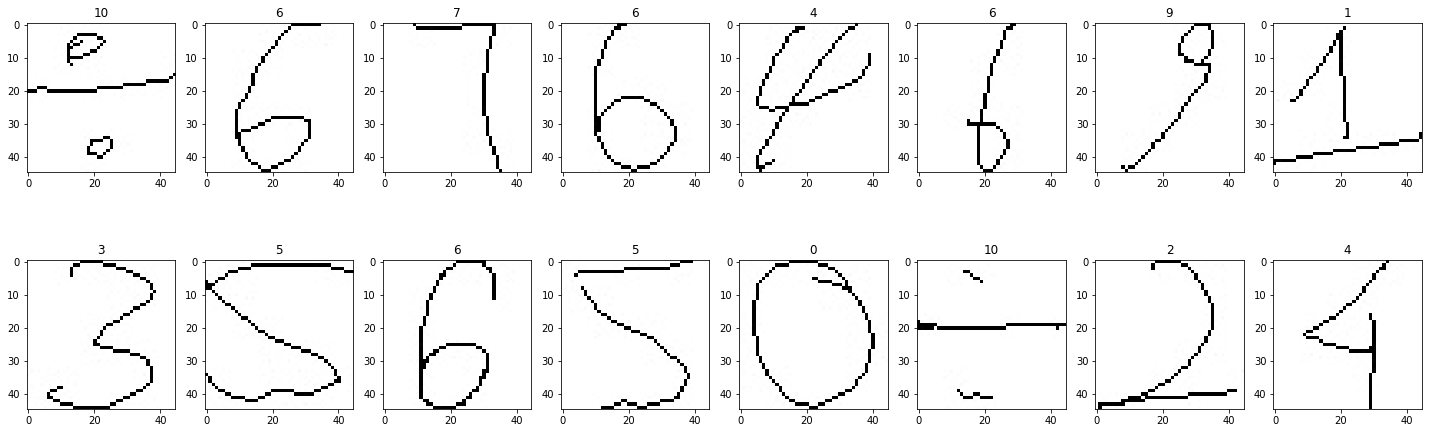

In [ ]:
# Plot several samples of the dataset

fig,ax = plt.subplots(2,8,figsize = (25,8))
ax = ax.ravel()
for i in range(16):
  rand = np.random.randint(0,np.shape(data)[0])
  image = data[rand]
  ax[i].imshow(image,cmap = 'gray')
  ax[i].set_title(labels[rand])
  
plt.show()

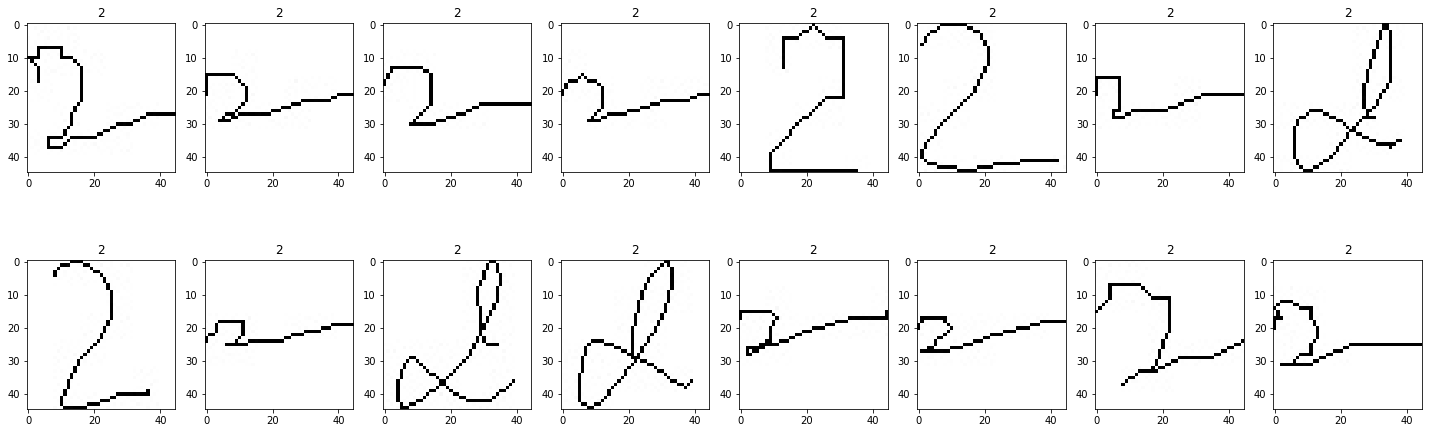

In [ ]:
# Plot several samples of one class of the dataset (here 16 pictures '2')

fig,ax = plt.subplots(2,8,figsize = (25,8))
ax = ax.ravel()
for i in range(16):
  image = data[i+2000]
  ax[i].imshow(image,cmap = 'gray')
  ax[i].set_title(labels[i+2000])
  
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


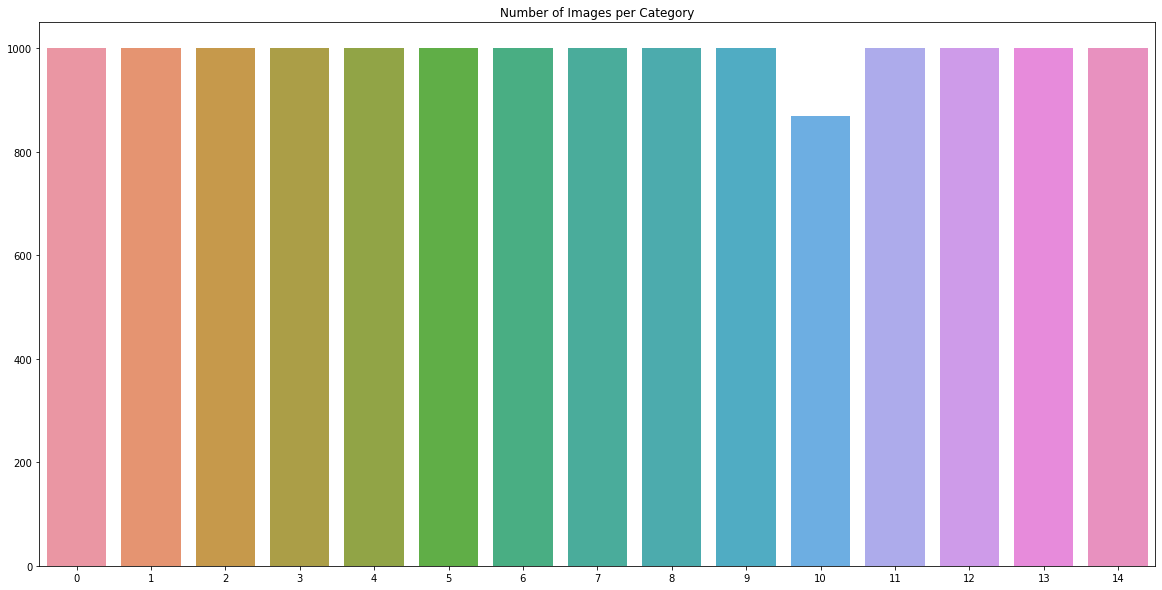

In [ ]:
# number  of samples per class

unique, count = np.unique(labels, return_counts=True)
figure = plt.figure(figsize=(20, 10))
sn.barplot(unique, count).set_title('Number of Images per Category')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


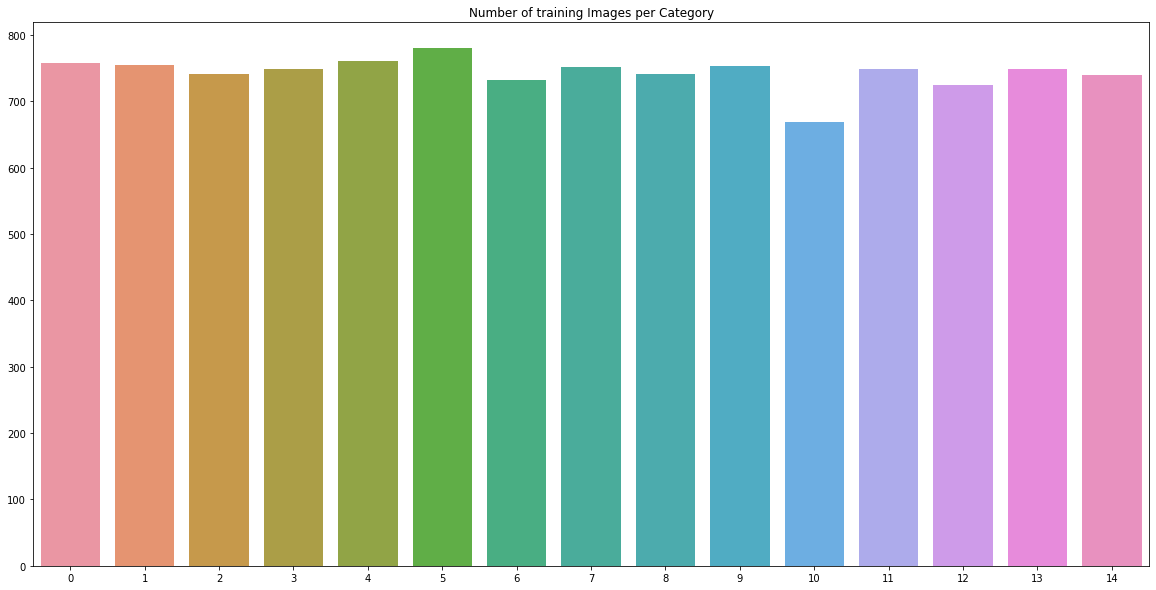

In [ ]:
# number of training  samples per class

unique, count = np.unique(labels_train, return_counts=True)
figure = plt.figure(figsize=(20, 10))
sn.barplot(unique, count).set_title('Number of training Images per Category')
plt.show()

In [ ]:
def one_hot(labels):
    labels = np.eye(len(np.unique(labels)))[labels]
    return labels

In [ ]:
labels_train = one_hot(labels_train)
labels_test = one_hot(labels_test)


In [ ]:
print(labels_test)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(45, 45, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(15))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 43, 43, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 21, 21, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 19, 19, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(data_train, labels_train,
                    validation_data=(data_test, labels_test), epochs=3, verbose=1)

Epoch 1/3
349/349 [==============================] - 30s 85ms/step - loss: 0.7406 - accuracy: 0.7751 - val_loss: 0.3245 - val_accuracy: 0.9018
Epoch 2/3
349/349 [==============================] - 29s 84ms/step - loss: 0.1590 - accuracy: 0.9553 - val_loss: 0.1293 - val_accuracy: 0.9631
Epoch 3/3
349/349 [==============================] - 29s 83ms/step - loss: 0.0887 - accuracy: 0.9732 - val_loss: 0.1116 - val_accuracy: 0.9661


In [ ]:
test_loss, test_acc = model.evaluate(data_test,  labels_test, verbose=2)
print(test_acc)

117/117 - 2s - loss: 0.1116 - accuracy: 0.9661 - 2s/epoch - 19ms/step
0.9661017060279846


In [ ]:
def find_index(array, value):
  index = 0
  for index in range (len(array)):  
    if array[index] == value :
      return index
    else :
      index = index+1

predicted name :  9


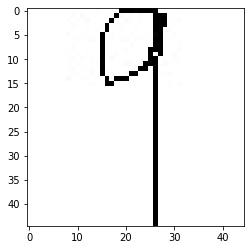

In [ ]:
test_im = data[9000]


plt.imshow(test_im,cmap = 'gray')

test_im=np.reshape(test_im,[-1,45,45,1])

pred = model.predict(test_im)
class_prediction = np.amax(pred)
index_class_pred = find_index(pred[0], class_prediction)
pred = np.argmax(pred, axis=1)
print("predicted name : ", pred[0])

(45, 45, 3)
model predict : [[  622.18445 -1737.0388   -409.8815    713.4904    439.85666  2464.763
   1962.6504    -30.28309  1081.0127    652.76794   609.8086   -413.49823
  -1863.6968   -946.47595   680.40393]]
predicted name :  5


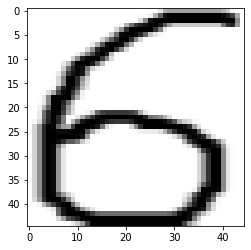

In [ ]:
a = cv2.imread('/content/gdrive/MyDrive/LSMA_Final_Project/Working/7.png')

print(np.shape(a))

a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)

plt.imshow(a,cmap = 'gray')

a=np.reshape(a,[-1,45,45,1])


pred = model.predict(a)
print('model predict :', pred)
class_prediction = np.amax(pred)
index_class_pred = find_index(pred[0], class_prediction)
pred = np.argmax(pred, axis=1)
print("predicted name : ", pred[0])

In [ ]:
def test_handwritten_recognition(img):
    img = cv2.resize(img, (800, 800))

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    # print(np.shape(img_gray))

    #detect edges
    edged = cv2.Canny(img_gray, 50, 150)

    
    plt.imshow(edged)


    # find contour : cv2.RETR_EXTERNAL -> only the outer border, cv2.CHAIN_APPROX_SIMPLE -> only keep the coordinates of the corner of the box
    contours = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # print('contour :' , contours)

    contours = imutils.grab_contours(contours)


    #Sort contour in the "reading" way
    contours = sort_contours(contours, method="left-to-right")[0]
    labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'div', 'mul', 'sub', 'eq']

    i = 0
    for c in contours:
        #make a rectangle out of the contour
        (x, y, w, h) = cv2.boundingRect(c)
        # if 20<=w and 30<=h:
        roi = img_gray[y:y+h, x:x+w]
        # print('roi : ',roi)
        thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

        
        print('tresh shape : ', np.shape(thresh))
        plt.imshow(thresh)

        (th, tw) = thresh.shape
        
        if tw > th:
          thresh = imutils.resize(thresh, width=45)
        if th > tw:
          thresh = imutils.resize(thresh, height=45)
        # if th < 45 :
        #     thresh = imutils.resize(thresh, height=45)
        # if tw < 45 :
        #     thresh = imutils.resize(thresh, width=45)
        # (th, tw) = thresh.shape
        print('tresh shape after reshape : ', np.shape(thresh))
        

  
        dx = int(max(0, 45 - tw)/2.0)
        dy = int(max(0, 45 - th) / 2.0)
        padded = cv2.copyMakeBorder(thresh, top=dy, bottom=dy, left=dx, right=dx, borderType=cv2.BORDER_CONSTANT,
                                  value=(0, 0, 0))
        
        # print(padded)
       
        padded = cv2.resize(padded, (45, 45))
        # padded = padded/255.
        padded = cv2.bitwise_not(padded)
        cv2.imwrite('/content/gdrive/MyDrive/LSMA_Final_Project/Working/'+ str(i) +'.png', padded)
        plt.imshow(padded)
        # padded = np.array(padded)
        # padded = padded/255.
        padded = np.expand_dims(padded, axis=0)
        padded = np.expand_dims(padded, axis=-1)
      

        
        pred = model.predict(padded)
        print('prediction vector :' , pred)
        class_prediction = np.amax(pred)
        print('class prediction :' ,class_prediction)
        index_class_pred = find_index(pred[0], class_prediction)

        print('prediction vector :' ,pred[0])
        pred = np.argmax(pred, axis=1)
        label = labels[pred[0]]
        print('prediction :' ,pred[0])
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
        cv2.putText(img, label, (x-5, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255))

        i = i+1

    # figure = plt.figure(figsize=(20, 20))
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # plt.imshow(img)
    # plt.axis('off')
    # plt.show()

tresh shape :  (69, 46)
tresh shape after reshape :  (45, 30)
prediction vector : [[  -12.859145  1450.7588    -305.32294    158.11613    305.82385
     25.153654  -333.01672    629.6251   -1111.6283     572.9292
    380.92072    161.56158    240.86098     -7.636066  -778.7409  ]]
class prediction : 1450.7588
prediction vector : [  -12.859145  1450.7588    -305.32294    158.11613    305.82385
    25.153654  -333.01672    629.6251   -1111.6283     572.9292
   380.92072    161.56158    240.86098     -7.636066  -778.7409  ]
prediction : 1
tresh shape :  (60, 45)
tresh shape after reshape :  (45, 33)
prediction vector : [[ 1197.6228  -1224.8026   1158.5369    578.9427    791.0709    946.5007
    441.45993   653.24506  2090.1655   1769.8888   -865.36053  -183.01392
  -2548.981    -505.42352  1295.257  ]]
class prediction : 2090.1655
prediction vector : [ 1197.6228  -1224.8026   1158.5369    578.9427    791.0709    946.5007
   441.45993   653.24506  2090.1655   1769.8888   -865.36053  -183.0

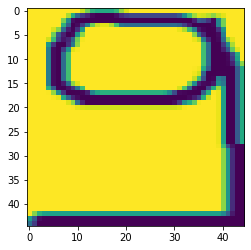

In [ ]:
image_to_test = cv2.imread('/content/gdrive/MyDrive/LSMA_Final_Project/Working/test.png')


# plt.imshow(image_to_test)
# print(np.shape(image_to_test))
# image_to_test = np.reshape(image_to_test,[-1,45,45,1])
# test_pipeline(image_to_test)
test_handwritten_recognition(image_to_test)